In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv('./data/amazon_sales_data 2025.csv')
sales.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [5]:
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [9]:
sales.shape

(250, 11)

In [11]:
sales.duplicated().sum()

0

In [13]:
sales.dtypes

Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object

In [15]:
sales.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

In [25]:
sales['Product'].unique()
sales['Product'].value_counts()

Product
Smartphone         35
Smartwatch         34
Running Shoes      27
Headphones         25
Book               25
Laptop             24
Refrigerator       24
T-Shirt            20
Jeans              20
Washing Machine    16
Name: count, dtype: int64

In [26]:
sales['Customer Location'].value_counts()

Customer Location
Houston          32
Miami            31
Dallas           29
New York         26
Denver           26
Boston           26
Seattle          22
Chicago          22
San Francisco    19
Los Angeles      17
Name: count, dtype: int64

In [30]:
# Ensure proper column types
sales['Category'] = sales['Category'].astype(str)
sales['Product'] = sales['Product'].astype(str)
sales['Customer Location'] = sales['Customer Location'].astype(str)
sales['Payment Method'] = sales['Payment Method'].astype(str)
sales['Status'] = sales['Status'].astype(str)
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales = sales.dropna(subset=['Date'])

In [31]:
sales.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

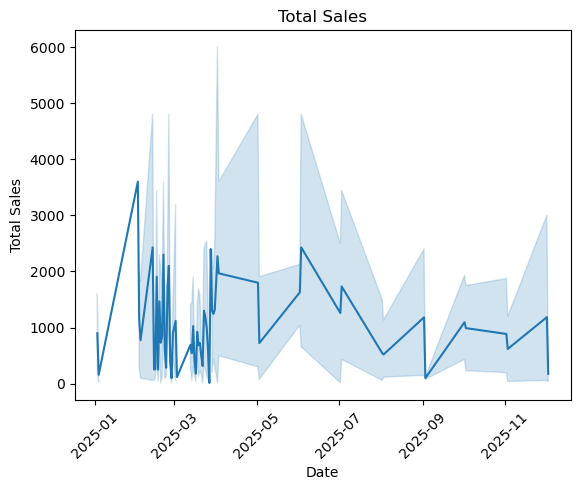

In [41]:
sns.lineplot(x='Date', y='Total Sales', data=sales)
plt.title('Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

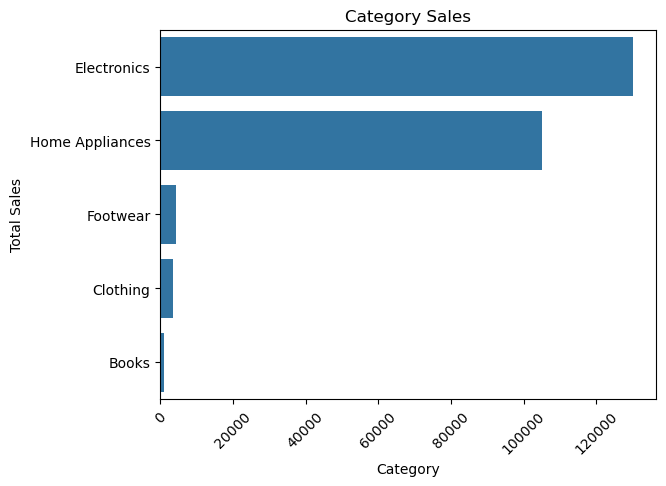

In [47]:
category_sales = sales.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Category Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Payment Counts')

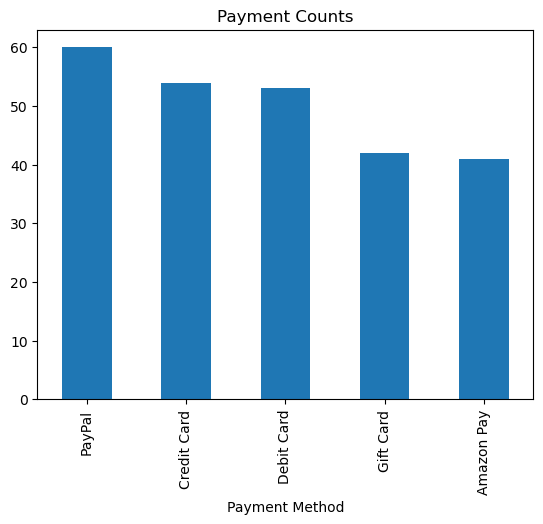

In [50]:
payment_counts = sales['Payment Method'].value_counts()
payment_counts.plot(kind='bar')
plt.title('Payment Counts')

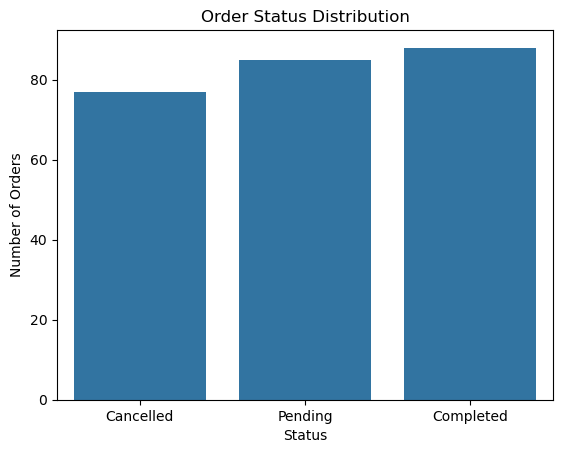

In [52]:
sns.countplot(data=sales, x='Status')
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()


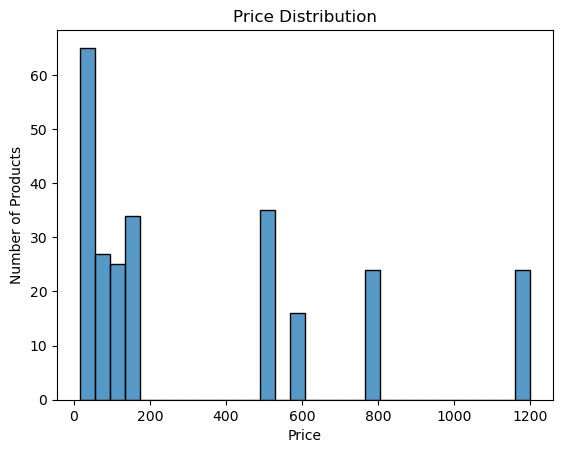

In [56]:
sns.histplot(sales['Price'], bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()


In [57]:
sales.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-10-03,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


<Axes: ylabel='Customer Location'>

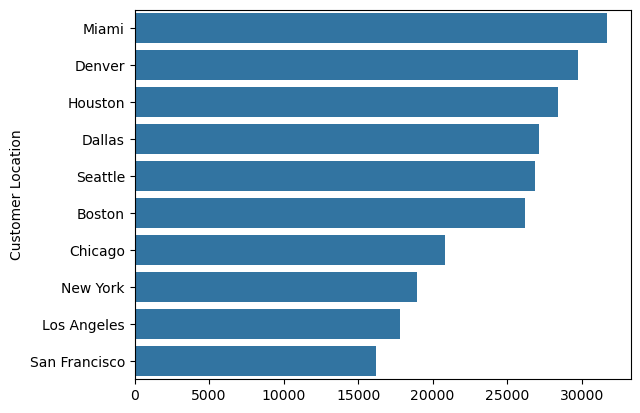

In [66]:
ByLocation = sales.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=ByLocation.values, y=ByLocation.index)

In [76]:
denverSales = sales[(sales['Customer Location'] == 'Denver') & (sales['Status'] == 'Completed')]
denverSales.head()

miamiSales = sales[(sales['Customer Location'] == 'Miami') & (sales['Status'] == 'Completed')]

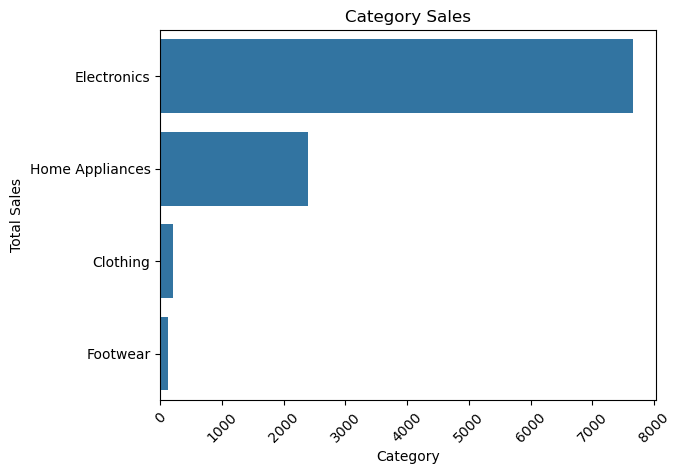

In [72]:
category_sales = denverSales.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Category Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [73]:
denverSales.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)

Category
Electronics        7650
Home Appliances    2400
Clothing            200
Footwear            120
Name: Total Sales, dtype: int64

In [77]:
miamiSales.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)

Category
Electronics        5800
Home Appliances    5400
Footwear            480
Name: Total Sales, dtype: int64